In [8]:
# 1. Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error

import warnings
warnings.filterwarnings('ignore')

print("Libraries imported successfully!")

Libraries imported successfully!


In [14]:
# 2. Load the dataset
data = pd.read_csv('https://raw.githubusercontent.com/tmkotresh/AdvancedRegression-HousePricing/main/train.csv')
# Display basic information
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [13]:
# 3. Understanding the problem and the dataset
# The objective is to predict house prices (SalePrice) using available features
# and apply regularization techniques (Ridge and Lasso) to avoid overfitting.

# Shape of the dataset
data.shape

# Check data types and missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [15]:
# 4. Data Cleaning
# Checking missing values percentage
missing = data.isnull().mean() * 100
missing.sort_values(ascending=False).head(10)

# Dropping columns with very high missing values (>40%)
high_missing_cols = missing[missing > 40].index
data = data.drop(columns=high_missing_cols)

# Separating numerical and categorical columns
num_cols = data.select_dtypes(include=[np.number]).columns
cat_cols = data.select_dtypes(exclude=[np.number]).columns

# Imputing numerical columns with median
for col in num_cols:
    data[col].fillna(data[col].median(), inplace=True)

# Imputing categorical columns with mode
for col in cat_cols:
    data[col].fillna(data[col].mode()[0], inplace=True)

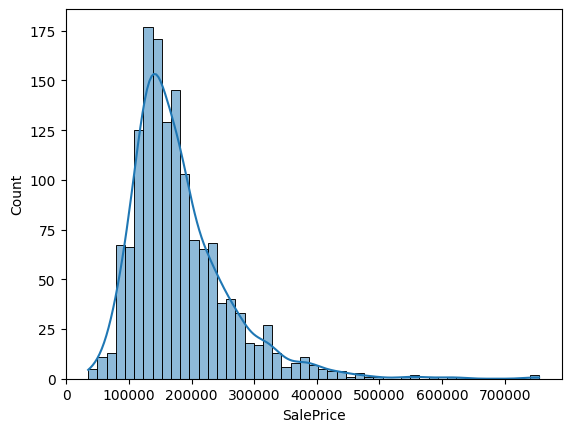

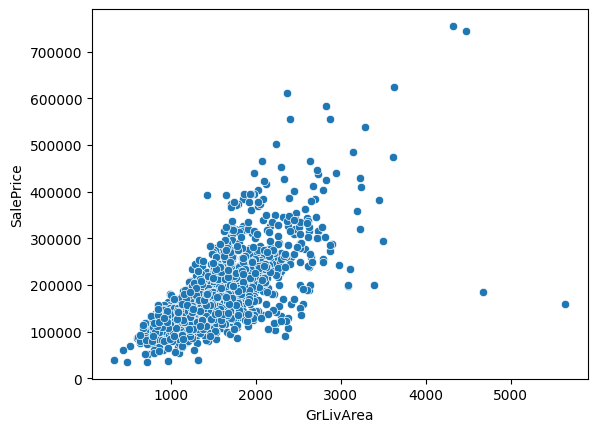

In [16]:
# 5. Exploratory Data Analysis
# Univariate analysis on target variable
plt.figure()
sns.histplot(data['SalePrice'], kde=True)
plt.show()

# Bivariate analysis between SalePrice and important numerical variables
plt.figure()
sns.scatterplot(x=data['GrLivArea'], y=data['SalePrice'])
plt.show()

In [17]:
# 6. Train-Test Split
X = data.drop('SalePrice', axis=1)
y = data['SalePrice']

# One-hot encoding categorical variables
X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [18]:
# 7. Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [19]:
# 8. Ridge Regression with Hyperparameter Tuning
ridge = Ridge()
params = {'alpha': np.logspace(-3, 3, 50)}

ridge_cv = GridSearchCV(ridge, params, cv=5, scoring='r2')
ridge_cv.fit(X_train_scaled, y_train)

best_ridge_alpha = ridge_cv.best_params_['alpha']

# Evaluate Ridge model
ridge_best = ridge_cv.best_estimator_
y_pred_ridge = ridge_best.predict(X_test_scaled)

ridge_r2 = r2_score(y_test, y_pred_ridge)
ridge_rmse = np.sqrt(mean_squared_error(y_test, y_pred_ridge))

best_ridge_alpha, ridge_r2, ridge_rmse

(np.float64(568.9866029018293),
 0.8593374884122208,
 np.float64(31329.79723057165))

In [20]:
# 9. Lasso Regression with Hyperparameter Tuning
lasso = Lasso(max_iter=5000)

lasso_cv = GridSearchCV(lasso, params, cv=5, scoring='r2')
lasso_cv.fit(X_train_scaled, y_train)

best_lasso_alpha = lasso_cv.best_params_['alpha']

# Evaluate Lasso model
lasso_best = lasso_cv.best_estimator_
y_pred_lasso = lasso_best.predict(X_test_scaled)

lasso_r2 = r2_score(y_test, y_pred_lasso)
lasso_rmse = np.sqrt(mean_squared_error(y_test, y_pred_lasso))

best_lasso_alpha, lasso_r2, lasso_rmse

(np.float64(754.3120063354608),
 0.8761553655438614,
 np.float64(29397.26978860775))

In [21]:
# 10. Feature Importance from Lasso
lasso_coef = pd.Series(lasso_best.coef_, index=X.columns)
important_features = lasso_coef[lasso_coef != 0].sort_values(key=abs, ascending=False)

important_features.head(10)

,0
GrLivArea,20697.462136
OverallQual,16392.708383
BsmtQual_Gd,-9621.078935
BsmtQual_TA,-8874.236644
MSSubClass,-8829.948003
Neighborhood_NridgHt,8101.243845
GarageCars,7744.442863
Neighborhood_NoRidge,7200.279134
KitchenQual_TA,-6394.230200
Neighborhood_StoneBr,6121.184969
